<center><h1> Data Analysis for Customer Segmentation </h1></center>

## NAN hadling

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

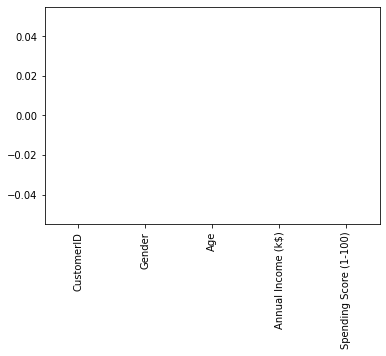

In [ ]:
(df.isna().sum()/df.shape[0]).plot(kind='bar')

## Outliers Detection

In [ ]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [ ]:
categorical_vars = []
numerical_vars = []
for col in df.columns:
    if df[col].dtype == object:
        categorical_vars.append(col)
    else:
        numerical_vars.append(col)

In [ ]:
numerical_vars

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

### Outlier với biến rời rạc

In [ ]:
stats = df[col].value_counts()

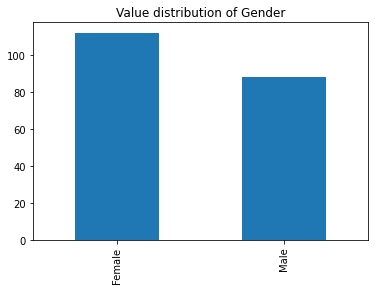

In [ ]:
import matplotlib.pyplot as plt

for col in categorical_vars:
    stats = df[col].value_counts()
    stats = stats/df.shape[0]
    outlier_values = stats[stats < 0.001]
    if len(outlier_values) > 0:
        print("Outlier detected:", ';'.join([str(i) for i in outlier_values.index]))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Value distribution of {col}")
    plt.show()

Biến gender không có outlier

### Outlier với biến liên tục

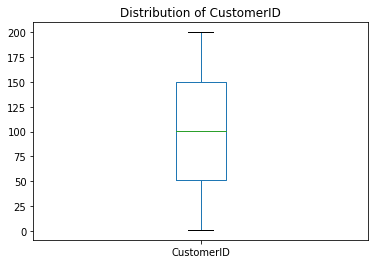

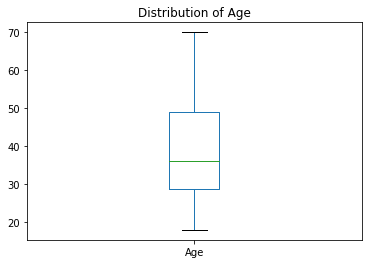

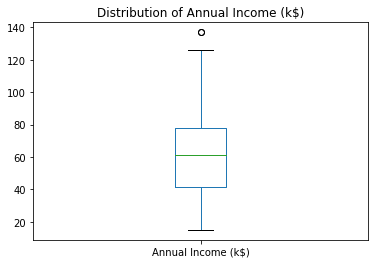

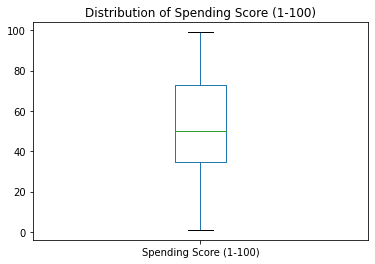

In [ ]:
for col in numerical_vars:
    df[col].plot(kind='box')
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
df = df.rename(columns = {'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score(1-100)'})

Biến Annual Income có Outlier

[array([41.5, 15. ]), array([ 78., 126.])]

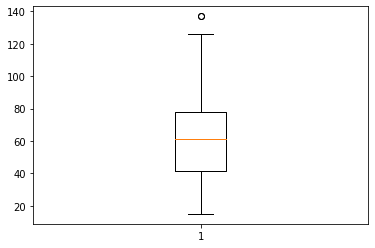

In [ ]:
B = plt.boxplot(df.Annual_Income)
[item.get_ydata() for item in B['whiskers']]

In [ ]:
[item.get_ydata()[1] for item in B['whiskers']]

[15.0, 126.0]

In [ ]:
df.drop(df.loc[df.Annual_Income > 126].index,inplace=True)

## Phân tích nhân tố

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

#### Phân tích Gender

In [ ]:
df1 = df.groupby('Gender').agg({'Gender':'count'})
df1['Ratio'] = (df1.Gender/df1.Gender.sum())*100
df1

,Gender,Ratio
Gender,,
Female,112,56.565657
Male,86,43.434343


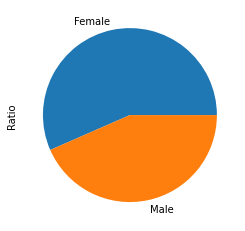

In [ ]:
df1.Ratio.plot(kind='pie')

Khách hàng nữ hơn 12% so với khách hàng nam

### Phân tích nhóm khách hàng độ tuổi (age_band)

In [ ]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

df['age_band'] = df['Age'].apply(age_band)

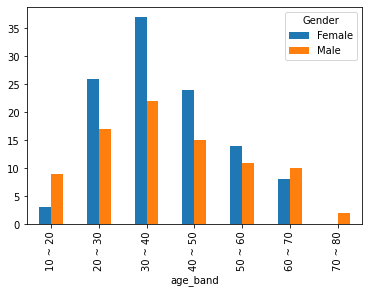

In [ ]:
df2 = df.groupby("age_band")['Gender'].value_counts().unstack().sort_index().fillna(0).astype(int)
df2.plot(kind ='bar')

## Nhận xét
- Nhóm khách hàng chủ yếu của trung tâm thương mại là từ 30-40 cho cả nam và nữ
- Tỷ lệ khách hàng nữ chiếm nhiều hơn so với nam ở hầu hết các nhóm tuổi ( chỉ trừ nhóm 10~20,60~70 và 70~80)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KeyError: ignored

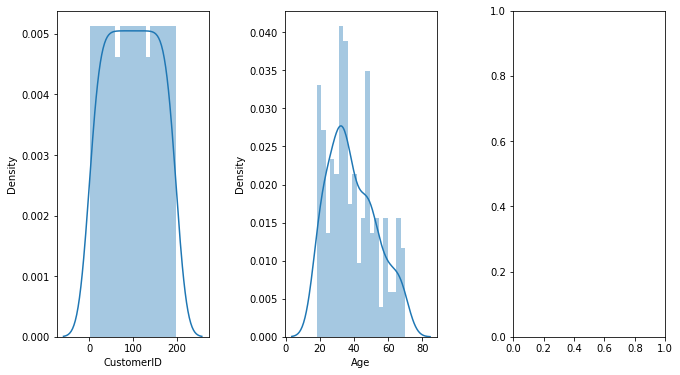

In [ ]:
plt.figure(1,figsize=(15,6))
n = 0
for vars in numerical_vars:
    n += 1
    plt.subplot(1 , 4, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[vars], bins = 20)
plt.show()

### Phân tích spending score theo gender và age_group

In [ ]:
df['Age_group'] = df['Age'].apply(
    lambda x: (x <36 and 'young') or (x <56 and 'adult') or 'senior')

In [ ]:
df_youth = df.loc[df.Age_group == "young"]
df_adult = df.loc[df.Age_group == "adult"]
df_senior= df.loc[df.Age_group == "senior"]

Text(0.5, 0.98, 'Young')

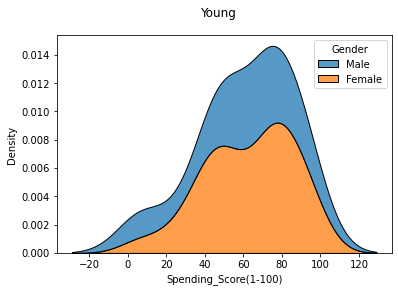

In [ ]:
fig1 = sns.kdeplot(data = df_youth["age_band"], x=df_youth["Spending_Score(1-100)"],hue=df_youth["Gender"],multiple="stack")
fig1.figure.suptitle("Young")

Text(0.5, 0.98, 'Adult')

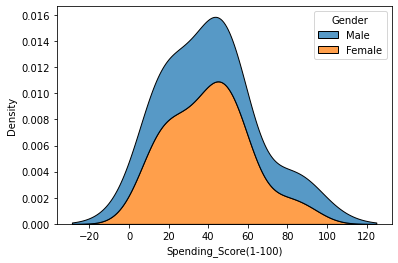

In [ ]:
fig2 = sns.kdeplot(data = df_adult["Age_group"], x=df_adult["Spending_Score(1-100)"],hue=df_adult["Gender"],multiple="stack")
fig1.figure.suptitle("Adult",size = 12)

Text(0.5, 0.98, 'Senior')

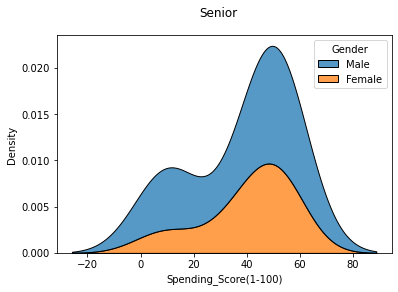

In [ ]:
fig3 = sns.kdeplot(data = df_senior["Age_group"], x=df_senior["Spending_Score(1-100)"],hue=df_senior["Gender"],multiple="stack")
fig3.figure.suptitle("Senior",size = 12)

### Nhận xét:
- Nhóm khách hàng trẻ (từ 18 đến 35 tuổi) có điểm tiêu dùng cao nhất. Nhóm khách hàng này thường xuyên tiêu dùng tại trung tâm mua sắm. Điểm tiêu dùng dao động từ 60 - 80 điểm trên thang 100
- Nhóm khách hàng trưởng thành (từ 36 đến 55 tuổi) có điểm tiêu dùng thấp hơn.
- Nhóm khách hàng senior không có điểm tiêu dùng quá 80

### Phân tích annual income theo age band

,Annual_Income,CustomerID
age_band,,
10 ~ 20,55.083333,12
20 ~ 30,51.837209,43
30 ~ 40,67.915254,59
40 ~ 50,63.948718,39
50 ~ 60,58.680000,25
60 ~ 70,49.166667,18
70 ~ 80,47.500000,2


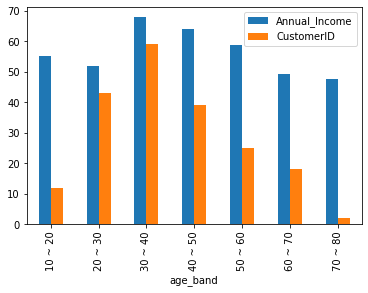

In [ ]:
df3 = df.groupby('age_band').agg({'Annual_Income':'mean','CustomerID':'count'})
df3.plot(kind='bar')
df3

,Annual_Income,CustomerID
Age_group,,
adult,64.794521,73
senior,53.689655,29
young,57.822917,96


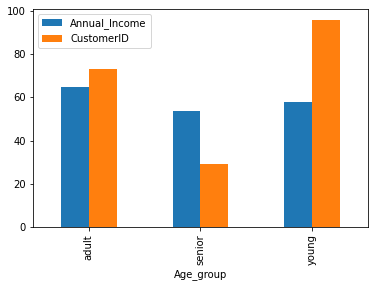

In [ ]:
df4 = df.groupby('Age_group').agg({'Annual_Income':'mean','CustomerID':'count'})
df4.plot(kind='bar')
df4

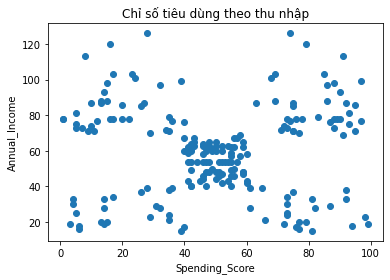

In [ ]:
x = df["Spending_Score(1-100)"]
y = df["Annual_Income"]
plt.scatter(x,y)
plt.title("Chỉ số tiêu dùng theo thu nhập")
plt.xlabel("Spending_Score")
plt.ylabel("Annual_Income")
plt.show()

## Nhận xét:
- Nhóm khách hàng từ 30-40 có mặt bằng thu nhập cao nhất và tiêu dùng nhiều nhất

## Customer segmentation with K-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
variables = df[['Age','Annual_Income','Spending_Score(1-100)']]

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
n_clusters=[2,3,4,5,6,7,8,9,10]
s_scores=[]
for n in n_clusters:
    KM_est = KMeans(n_clusters=n,init='k-means++').fit(variables)
    silhouette_avg=silhouette_score(variables,KM_est.labels_)
    s_scores.append(silhouette_avg)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


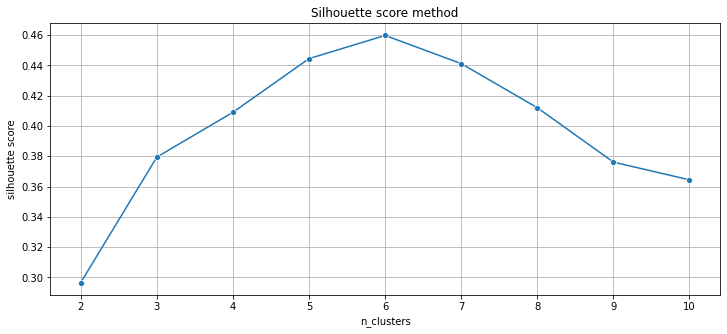

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters,s_scores,marker='o',ax=ax)
ax.set_title('Silhouette score method')
ax.set_xlabel('n_clusters')
ax.set_ylabel('silhouette score')
plt.grid()
plt.show()

Phương pháp silhouette score cho thấy số cụm phù hợp là 6

### **Cluster with KMeans**

In [ ]:
KM_clusters = KMeans(n_clusters=6,init='k-means++').fit(variables)
KM_clustered = variables
KM_clustered.loc[:,'Cluster']= KM_clusters.labels_

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


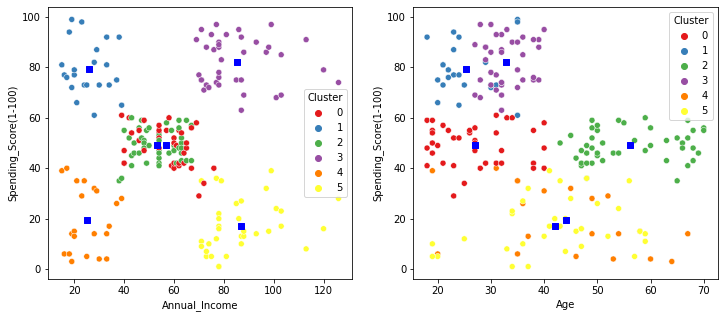

In [ ]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot('Annual_Income', 'Spending_Score(1-100)', data=KM_clustered,
                hue='Cluster',ax=axes[0],palette='Set1')
sns.scatterplot('Age', 'Spending_Score(1-100)', data=KM_clustered,
                hue='Cluster',ax=axes[1],palette='Set1')
axes[0].scatter(KM_clusters.cluster_centers_[:,1], KM_clusters.cluster_centers_[:,2], marker='s', c="blue")
axes[1].scatter(KM_clusters.cluster_centers_[:,0], KM_clusters.cluster_centers_[:,2], marker='s', c="blue")
plt.show()

In [ ]:
KM_clusters.cluster_centers_[:,1]

array([56.65789474, 25.72727273, 53.37777778, 85.21052632, 25.14285714,
       86.79411765])

Với số cụm là 6 thì sẽ có những nhóm khách hàng sau:

0. Nhóm khách hàng với spending_score thấp (<40) và thu nhập thấp (<40)
1. Nhóm khách hàng trẻ (20-40t) với spending_score trung bình (40-60) và thu nhập trung bình (40-60)
2. Nhóm khách hàng trẻ (30-40t) với spending_score cao (60-100) và thu nhập cao (>80)
3. Nhóm khách hàng với spending_score thấp (<40) và thu nhập cao (>80)
4. Nhóm khách hàng adult (>50t) với spending_score trung bình và thu nhập trung bình
5. Nhóm khách hàng trẻ với spending_score cao và thu nhập thấp

In [ ]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending_Score(1-100)'],
    z= df['Annual_Income'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending_Score'),
            zaxis = dict(title  = 'Annual_Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

NameError: ignored

## Cluster with K-medois

In [ ]:
pip install -U scikit-learn-extra

     |████████████████████████████████| 1.7MB 7.6MB/s 
     |████████████████████████████████| 22.3MB 52.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn_extra.cluster import KMedoids
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
df = files.upload()

Saving Mall_Customers.csv to Mall_Customers (2).csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(df['Mall_Customers.csv']))

In [ ]:
df2 = df2.rename(columns = {'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score(1-100)'})

In [ ]:
variables = df2[['Age','Annual_Income','Spending_Score(1-100)']]
KMedoids_clusters = KMedoids(n_clusters=6, init='k-medoids++').fit(variables)
KMedoids_clustered = variables.copy()
KMedoids_clustered.loc[:,'Cluster']= KMedoids_clusters.labels_

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


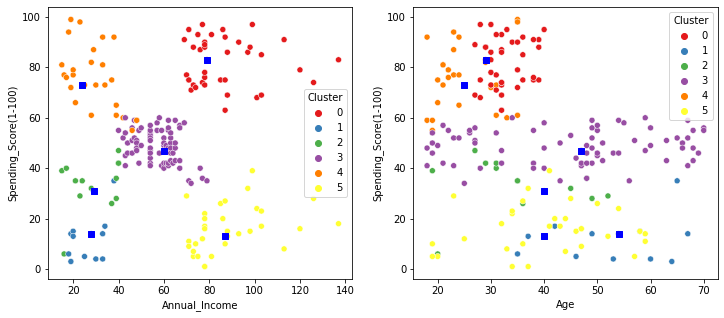

In [ ]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot('Annual_Income', 'Spending_Score(1-100)', data=KMedoids_clustered,
                hue='Cluster',ax=axes[0],palette='Set1')
sns.scatterplot('Age', 'Spending_Score(1-100)', data=KMedoids_clustered,
                hue='Cluster',ax=axes[1],palette='Set1')
axes[0].scatter(KMedoids_clusters.cluster_centers_[:,1], KMedoids_clusters.cluster_centers_[:,2], marker='s', c="blue")
axes[1].scatter(KMedoids_clusters.cluster_centers_[:,0], KMedoids_clusters.cluster_centers_[:,2], marker='s', c="blue")
plt.show()

## Clustering with PCA

In [ ]:
## Step1: Find the principal components!
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca.fit(variables)
pca.explained_variance_ratio_

array([0.45069884, 0.44023545, 0.10758015, 0.00148555])

In [ ]:
pca.components_

array([[-0.18871029,  0.58973185,  0.78493845,  0.02182675],
       [ 0.13126106,  0.80745566, -0.57513758,  0.00163084],
       [ 0.97322033,  0.00546248,  0.22979092,  0.002912  ],
       [-0.00107111,  0.01420814,  0.01686796, -0.9997562 ]])

In [ ]:
dimensions = ['Dimension{}'.format(i) for i in range(1,len(pca.components_)+1)]
components = pd.DataFrame(pca.components_,columns=variables.columns)
components.index = dimensions
variance = pd.DataFrame(pca.explained_variance_ratio_,columns=['Explained Variance'])
variance.index = dimensions
pd.concat([variance,components],axis=1)

,Explained Variance,Age,Annual_Income,Spending_Score(1-100),Cluster
Dimension1,0.450699,-0.188710,0.589732,0.784938,0.021827
Dimension2,0.440235,0.131261,0.807456,-0.575138,0.001631
Dimension3,0.107580,0.973220,0.005462,0.229791,0.002912
Dimension4,0.001486,-0.001071,0.014208,0.016868,-0.999756


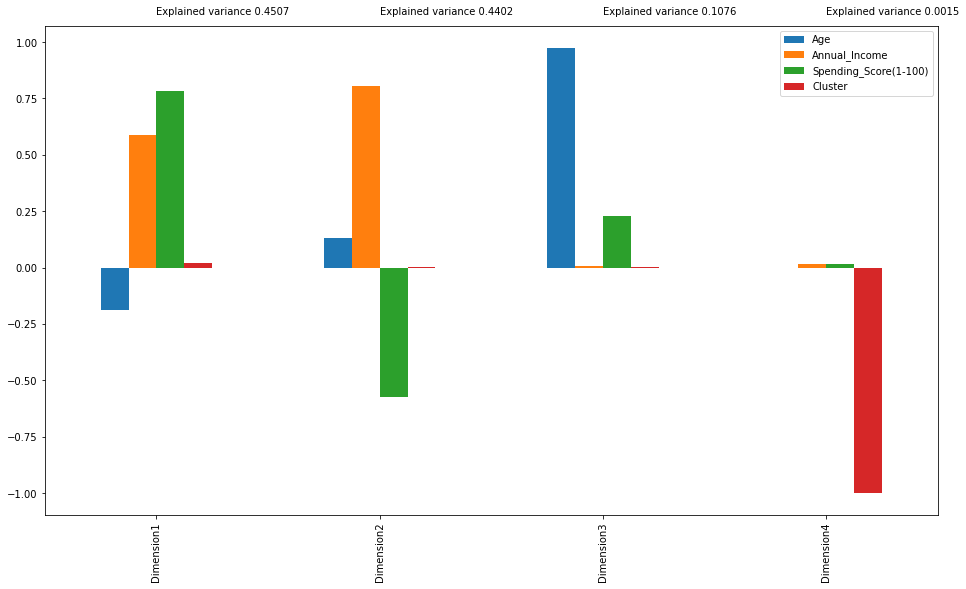

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,9))
components.plot(kind='bar', ax=ax)
ax.set_xticklabels(dimensions)
for i,variance in enumerate(pca.explained_variance_ratio_):
    ax.text(i,ax.get_ylim()[1]+0.05,'Explained variance {}'.format(np.round(variance,4)))
plt.show()

=> Chọn PCA_components = 2

In [ ]:
from sklearn.preprocessing import StandardScaler
data_tx=StandardScaler().fit_transform(variables)

In [ ]:
k_inertia=[]

for i in range(1, 11):
    km=KMeans(n_clusters=6, n_init=10, init='k-means++')
    km.fit(data_tx)
    k_inertia.append(km.inertia_)

In [ ]:
pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(data_tx)
reduced_data

array([[ 0.45483685,  1.45917969],
       [ 0.04169008,  2.85830152],
       [-0.3581185 ,  1.011009  ],
       [-0.11569012,  2.71804365],
       [ 0.06572347,  1.02414137],
       [-0.09313264,  2.71056869],
       [-0.87946592,  0.46666603],
       [ 0.31035446,  2.86109344],
       [-1.98843445, -0.53994242],
       [-0.45699543,  2.34692209],
       [-1.83444675, -0.50837755],
       [ 0.00636645,  2.5012693 ],
       [-1.47516634, -0.23219954],
       [-0.11069001,  2.57249109],
       [-0.7641943 ,  0.42728087],
       [ 0.00926844,  2.66101302],
       [-0.15691772,  0.72232765],
       [-0.21826841,  2.54519038],
       [-0.89363085,  0.04250623],
       [ 0.02364216,  2.37649945],
       [-0.12607208,  0.6375546 ],
       [-0.20109715,  2.37998202],
       [-1.22874611, -0.10061711],
       [-0.40757974,  2.15659329],
       [-1.27225346, -0.33991275],
       [-0.08981296,  2.24251607],
       [-0.51777412,  0.16408809],
       [-0.8074655 ,  1.80086337],
       [-0.35070699,

In [ ]:
reduced_data = pd.DataFrame(reduced_data, columns=['PC1','PC2'])
reduced_data.head()

,PC1,PC2
0,0.454837,1.459180
1,0.041690,2.858302
2,-0.358118,1.011009
3,-0.115690,2.718044
4,0.065723,1.024141


In [ ]:
clusters = km.predict(data_tx)
clusters

array([4, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 1, 3, 1, 4,
       5, 3, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 2, 4, 2, 0, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
reduced_data['clusters'] = clusters
reduced_data.head()

,PC1,PC2,clusters
0,0.454837,1.459180,4
1,0.041690,2.858302,3
2,-0.358118,1.011009,5
3,-0.115690,2.718044,3
4,0.065723,1.024141,5


In [ ]:
reduced_data['clusters'].value_counts()

1    46
4    39
2    39
0    34
3    22
5    20
Name: clusters, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

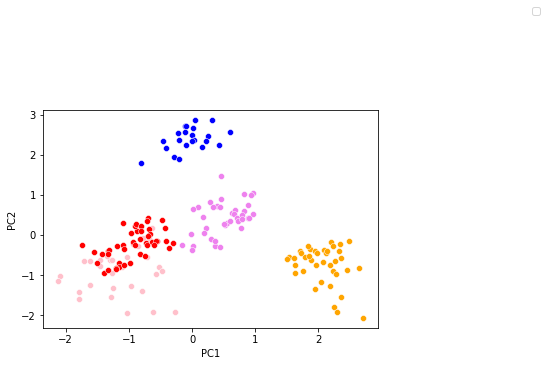

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(reduced_data.loc[reduced_data['clusters']==0, 'PC1'], reduced_data.loc[reduced_data['clusters']==0, 'PC2'],color='pink')
sns.scatterplot(reduced_data.loc[reduced_data['clusters']==1, 'PC1'], reduced_data.loc[reduced_data['clusters']==1, 'PC2'],color='red')
sns.scatterplot(reduced_data.loc[reduced_data['clusters']==2, 'PC1'], reduced_data.loc[reduced_data['clusters']==2, 'PC2'],color='orange')
sns.scatterplot(reduced_data.loc[reduced_data['clusters']==3, 'PC1'], reduced_data.loc[reduced_data['clusters']==3, 'PC2'],color='blue')
sns.scatterplot(reduced_data.loc[reduced_data['clusters']==4, 'PC1'], reduced_data.loc[reduced_data['clusters']==4, 'PC2'],color='violet')

plt.legend(loc='best', bbox_to_anchor=(1.5, 1.5))
plt.show()

### Cách phân nhóm 1 người mới

Ý tưởng của em là lập thành bảng gồm các nhóm và điểm trung tâm của các nhóm đó. Xong lấy data mới xem cái nào cách gần nhất với data đấy thì cho nó vào nhóm đó. 

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df1 = df.append(new_client,ignore_index=True)

In [ ]:
df2 = df1[df1['CustomerID']=='201']
df2

,CustomerID,Gender,Age,Annual_Income,Spending_Score(1-100)
200,201,Female,56,25,78


In [ ]:
variables2 = df2[['Age','Annual_Income','Spending_Score(1-100)']]
variables2

,Age,Annual_Income,Spending_Score(1-100)
200,56,25,78


In [ ]:
KM_clusters.predict(variables2)

array([0], dtype=int32)

Khách hàng mới add vào này thuộc nhóm 0

In [ ]:
new_client2 = {'CustomerID':202,'Gender':'Male','Age':20,'Annual_Income':17,'Spending_Score(1-100)':20}

In [ ]:
df = df.append(new_client2,ignore_index=True)

In [ ]:
df3 = df[df['CustomerID']== 202]

,CustomerID,Gender,Age,Annual_Income,Spending_Score(1-100)
201,202,Male,20,17,20


In [ ]:
variables3 = df3[['Age','Annual_Income','Spending_Score(1-100)']]
variables3

,Age,Annual_Income,Spending_Score(1-100)
201,20,17,20


In [ ]:
KM_clusters.predict(variables3)

array([4], dtype=int32)

Khách hàng này thuộc nhóm 4

In [ ]:
KM_clusters.cluster_centers_

array([[25.27272727, 25.72727273, 79.36363636],
       [41.68571429, 88.22857143, 17.28571429],
       [56.15555556, 53.37777778, 49.08888889],
       [27.        , 56.65789474, 49.13157895],
       [44.14285714, 25.14285714, 19.52380952],
       [32.69230769, 86.53846154, 82.12820513]])